In [ ]:
import pandas as pd
import numpy as np


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = os.getcwd()+"/data"

In [3]:
trainDf= pd.read_csv(data_dir+"/train.csv",header=None)
trainDf[246] = trainDf[245]
trainDf[245] = np.ones(30000)
trainDf.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,43.437500,75.562500,0.0,634.0,20.0,16.000000,44.562500,0.0,473.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,47.781250,93.750000,1.0,598.0,7.5,17.859375,56.875000,0.0,594.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0
2,2.273438,4.984375,0.0,44.0,1.0,1.029297,3.003906,0.0,37.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,10.148438,32.406250,0.0,292.0,0.0,5.152344,20.453125,0.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.285156,8.414062,0.0,102.0,1.0,0.973633,4.722656,0.0,93.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
len(trainDf)

30000

In [5]:
train = 30000

X_train = trainDf.iloc[:train,:-1].values
Y_train = trainDf.iloc[:train,246].values
# X_test = trainDf.iloc[train:,:-1].values
# Y_test = trainDf.iloc[train:,246].values
# print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
XtY = np.matmul(X_train.transpose(),Y_train)
Wopt = np.matmul(XtXinv,XtY)
print(Wopt.shape)

Y_predicted = np.matmul(X_train,Wopt)

diff = Y_predicted-Y_train
error = np.linalg.norm(diff)**2/np.sum(np.square(Y_train))
print((error))



(246,)
0.6080463224138243


In [4]:

# feature=[44,45,46,47,48,49,50,51,52,53,243,244,245]

feature=[44,45,47,54,55,243,244]
k=10

In [29]:
k = 10
features = trainDf.iloc[:,:-1].values
labels = trainDf.iloc[:,246].values
er=[]
# hyperParam = lamda[0]
lossmin = np.inf
j=0;
print(features.shape,labels.shape)

(30000, 246) (30000,)


0.6059867583481511
0.7984828628262568
0.6526694243696856
3.2468685800062204e+30
0.6172193890743598
4.904320309287965e+31
0.6760948375168531
0.5957578320924373
2.198149710043286e+31
0.5819037579068772


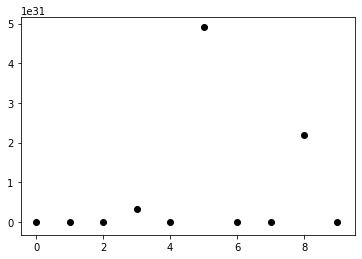

In [30]:
for i in range(0,k):
    X_test = features[int(i*30000/k):int((i+1)*30000/k)]
    Y_test = labels[int(i*30000/k):int((i+1)*30000/k)]
    X_train = np.concatenate((features[:int(i*30000/k)],features[int((i+1)*30000/k):]),axis=0)
    Y_train = np.concatenate((labels[:int(i*30000/k)],labels[int((i+1)*30000/k):]),axis=0)
#     print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
    XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
    XtY = np.matmul(X_train.transpose(),Y_train)
    Wopt = np.matmul(XtXinv,XtY)
#     print(Wopt.shape)
    Y_predicted = np.matmul(X_test,Wopt)
    diff = Y_predicted-Y_test
    error = np.linalg.norm(diff)**2/np.sum(np.square(Y_test))
    print(error)
    er.append(error)
    plt.scatter(i,error,color="black")


In [31]:
er =np.array(er)
er[er>1]=0

In [32]:
np.mean(er)

0.452811486213462

In [16]:
error/np.sum(np.square(Y_test))

7.017938611635756e+36

In [33]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
df

,Actual,Predicted
0,184.0,79.876123
1,0.0,11.165866
2,0.0,2.271779
3,0.0,-6.713377
4,5.0,-4.281255
5,0.0,-3.976772
6,1.0,9.523305
7,0.0,24.885405
8,1.0,-1.470623
9,0.0,2.246661


In [21]:
Y_predicted.tolist()

[107.12039089411024,
 0.0,
 3.2703690632744937,
 2.09374108955128,
 2.2843032861621726,
 0.0,
 1.0819510668858956,
 17.37296813123381,
 -0.09050984413255492,
 0.0,
 -0.9333324689097076,
 21.740267306301806,
 0.0,
 0.0,
 18.435002713946723,
 0.6829064567438831,
 0.6493266213952804,
 3.634931277714032,
 -0.025859955466444262,
 -0.012929977733222131,
 0.0,
 0.5634292115847721,
 1.2047180003948155,
 2.8909360404806095,
 0.0,
 0.0,
 44.589035840391986,
 1.2906071192061475,
 -0.10343982186577705,
 25.166838824519875,
 3.2703690632744937,
 27.417243743778215,
 2.1913002419968737,
 3.2703690632744937,
 3.2703690632744937,
 0.3602546769423462,
 145.11934082906834,
 23.230928145710653,
 0.0,
 -3.938560529695893,
 -0.012929977733222131,
 0.0,
 0.6453035596030737,
 3.4962543398259838,
 0.7463693093511367,
 0.0,
 0.0,
 160.68058634116534,
 27.118133967522898,
 1.8412503539702545,
 1.2200220502457517,
 29.361311961939855,
 0.30853476600945773,
 3.2445091078080495,
 -0.012929977733222131,
 0.64530355

In [19]:
Y_test.tolist()

[184.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 5.0,
 7.0,
 0.0,
 0.0,
 28.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 54.0,
 5.0,
 0.0,
 7.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 103.0,
 116.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 80.0,
 1.0,
 0.0,
 2.0,
 35.0,
 0.0,
 0.0,
 0.0,
 5.0,
 5.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 50.0,
 0.0,
 55.0,
 7.0,
 1.0,
 0.0,
 0.0,
 1.0,
 65.0,
 0.0,
 5.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 7.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 0.0,
 14.0,
 0.0,
 24.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 31.0,
 2.0,
 1.0,
 0.0,
 12.0,
 0.0,
 0.0,
 147.0,
 0.0,
 0.0,
 69.0,
 0.0,
 46.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 5.0,
 3.0,
 0.0,
 3.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 149.0,
 0.0,
 28.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 30.0,
 1.0,
 4.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 0.0,
 7.

11.519014394820054 0
9.965449001129622 1
10.351929165432233 2
9.884211252974362 3
9.780888050166238 4
9.783773379386997 5
9.72167093721277 6
9.732765391677232 7
9.709463273444959 8
9.710022088076705 9
9.694374583043073 10
9.692224835509661 11
9.695245157763987 12
9.700606477847444 13
9.700631614552659 14
9.701895667728516 15
9.706428424831126 16
9.706925670814682 17
9.707464947175614 18
9.715439853890416 19
9.758216209348857 20
9.846305375986052 21
9.854379585144176 22
9.950479110864737 23
9.360358272002745 24
9.366374073930597 25
9.36809646913779 26
9.36878511625261 27
9.347165654576644 28
9.348735275097406 29
9.354649277700172 30
9.352719032214273 31
9.352339713517907 32
9.519613112289168 33
9.611990048434475 34
9.613863972349462 35
9.735798894942468 36
9.735429835422067 37
9.765178561910744 38
9.769557326453523 39
9.776306480336073 40
9.810072732052362 41
9.882058229157757 42
9.899661066619714 43
10.060593751387056 44
10.059721764313739 45
10.073958122309818 46
10.530494269595321 47

LinAlgError: Singular matrix

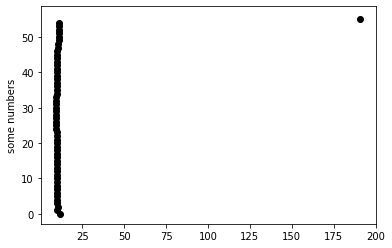

In [217]:
for r in range(0,100):
    x=r-1
    # r = 101
    X_train = trainDf.iloc[:20000,x:x+r].values
    # X_train = np.c_[X_train,np.ones(20000)]
    Y_train = trainDf.iloc[:20000,245].values
    X_test = trainDf.iloc[20000:,x:x+r].values
    # X_test = np.c_[X_test,np.ones(10000)]
    Y_test = trainDf.iloc[20000:,245].values
    # print(X_train[:,-1].tolist())
    # print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
    XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
    XtY = np.matmul(X_train.transpose(),Y_train)
    # print(XtXinv.shape,XtY.shape)
    Wopt = np.matmul(XtXinv,XtY)
    # print(Wopt.shape)
    Y_predicted = np.matmul(X_train,Wopt)
    diff = Y_predicted-Y_train
    error = np.sqrt(np.dot(diff.transpose(), diff))/(2*245)
    print((error), r)
    plt.scatter(error,r,color='black')
    plt.ylabel('some numbers')
#     plt.axis([0, 20, 0, 20])
plt.show()

In [110]:
XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
XtY = np.matmul(X_train.transpose(),Y_train)
print(XtXinv.shape,XtY.shape)
Wopt = np.matmul(XtXinv,XtY)
print(Wopt.shape)

(1, 1) (1,)
(1,)


2826.970799320278

In [113]:
Y_test.tolist()

[0.0,
 0.0,
 0.0,
 2.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.0,
 2.0,
 11.0,
 0.0,
 15.0,
 0.0,
 4.0,
 0.0,
 5.0,
 1.0,
 0.0,
 39.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 30.0,
 0.0,
 45.0,
 4.0,
 75.0,
 0.0,
 0.0,
 5.0,
 45.0,
 1.0,
 0.0,
 3.0,
 0.0,
 1.0,
 9.0,
 0.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 0.0,
 75.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 7.0,
 3.0,
 0.0,
 7.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 41.0,
 1.0,
 12.0,
 1.0,
 34.0,
 1.0,
 27.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 0.0,
 0.0,
 0.0,
 1.0,
 8.0,
 0.0,
 2.0,
 8.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 35.0,
 0.0,
 0.0,
 7.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 11.0,
 0.0,
 0.0,
 1.0,
 12.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 12.0,
 3.0,
 0.0,
 0.0,
 1.0,
 4.0,
 0.0,
 0.0,
 11.0,
 223.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 4.0,
 33.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 

In [ ]:
X_test = testDf.values

In [69]:
testDf= pd.read_csv(data_dir+"/test_X.csv",header=None)

In [70]:
X_test = testDf.values

In [74]:
print(X_test.shape,Wopt.shape)

(10000, 245) (245,)


In [75]:
Y_test = np.matmul(X_test,Wopt)

In [77]:
Y_test.tolist()

[25.629281181183593,
 3.806868450559346,
 23.24296324190516,
 0.19504466518283792,
 -0.5465314888782693,
 -2.0094792345202483,
 -4.350412658398717,
 -2.6502831294564473,
 14.000602678058257,
 -3.029124142213451,
 0.30838248228622245,
 10.018022038687224,
 -0.7354952448610916,
 8.734735721019314,
 5.125580590625174,
 9.246481638907106,
 -7.521794619331962,
 5.838635274000916,
 0.35685476030294794,
 -3.5713187727503914,
 0.23845316984365894,
 6.912499720164114,
 2.5554603540648344,
 -2.4324685918984894,
 -0.2532730262154459,
 5.149478418668529,
 10.622740952216212,
 13.377434624705856,
 -2.9538097634414093,
 3.3780201697971037,
 -3.933279970700326,
 -3.807859598142443,
 98.03613469436245,
 -0.08628668948605167,
 -8.037340698466757,
 15.121039561130658,
 1.1994837323378817,
 -0.6384842960334538,
 -3.2842603649497057,
 -5.145126927204071,
 1.819155711253103,
 5.66216629151511,
 -1.6205183264468985,
 20.329476388402497,
 2.015989885136918,
 8.018458897320222,
 -0.7195024225730968,
 -6.30810

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show()
  
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \  \nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 


Estimated coefficients:
b_0 = 1.2363636363636363  \  
b_1 = 1.1696969696969697


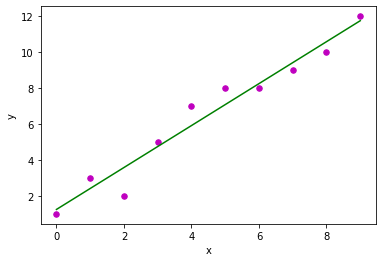

In [100]:
plot_regression_line(x, y, b) 
